# Домашнее задание 3

## Предсказание пользовательской оценки отеля по тексту отзыва

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву. Данные можно скачать тут.

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 1. В противном случае мы будем вынуждены не засчитать задание :(

Для измерения качества вашей модели используйте разбиение данных на train и test и замеряйте качество на тестовой части.

### Про данные:

Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

In [10]:
# загрузим данные
!wget https://www.dropbox.com/s/meqq0p17jxnmydp/hseds-texts-2020.zip?dl=0

--2021-03-21 10:05:32--  https://www.dropbox.com/s/meqq0p17jxnmydp/hseds-texts-2020.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/meqq0p17jxnmydp/hseds-texts-2020.zip [following]
--2021-03-21 10:05:32--  https://www.dropbox.com/s/raw/meqq0p17jxnmydp/hseds-texts-2020.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca51d9be86d23b41bc4295716be.dl.dropboxusercontent.com/cd/0/inline/BLHxy6vBrVuXoLpGyYuVOK3eLRPMrE3Gmmbqx58af44SvSm8qGLp1oM8zL1msKMuoppzQ1kIoD-s_NluagcZ9LFfB1m3FZH8bNgJZQAm6qcMVPt-nI6YNf6jPbURcUZGYmGNlKvpa5MOx15FTNjmmgob/file# [following]
--2021-03-21 10:05:33--  https://uca51d9be86d23b41bc4295716be.dl.dropboxusercontent.com/cd/0/inline/BLHxy6vBrVuXoLpGyYuVOK3eLRPMrE3Gmmbqx58af44SvSm8qGLp1oM8zL

In [11]:
!unzip -q hseds-texts-2020.zip?dl=0

In [12]:
PATH_TO_TRAIN_DATA = '/content/train.csv'

In [13]:
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm

In [14]:
import pandas as pd

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df.head()

,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


Предобработка текста может сказываться на качестве вашей модели. Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру.

In [15]:
import string

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def process_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
df['negative'] = df['negative'].apply(process_text)
df['positive'] = df['positive'].apply(process_text)

In [17]:
from sklearn.model_selection import train_test_split
np.random.seed(13)
df_train, df_test = train_test_split(df)

## Часть 1

Обучите линейную регрессию на TF-IDF векторах текстов.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error as mae

In [19]:
X_train = df_train[['negative', 'positive']]
y_train = df_train['score'].to_numpy()

X_test = df_test[['negative', 'positive']]
y_test = df_test['score'].to_numpy()

In [20]:
X_train['negative'] = X_train['negative'].apply(' '.join)
X_train['positive'] = X_train['positive'].apply(' '.join)

X_test['negative'] = X_test['negative'].apply(' '.join)
X_test['positive'] = X_test['positive'].apply(' '.join)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [21]:
x_train = (X_train['negative'] + ' ' + X_train['positive']).values
x_test = (X_test['negative'] + ' ' + X_test['positive']).values

In [22]:
v = TfidfVectorizer(min_df=4)
train_tfidf = v.fit_transform(x_train)
test_tfidf = v.transform(x_test)

In [23]:
reg = LinearRegression().fit(train_tfidf, y_train)
y_pred = reg.predict(test_tfidf)

In [24]:
print(f'MAE = {mae(y_test, y_pred)}')

MAE = 0.9381740390845583


## Часть 2

Обучите линейную на усредненных Word2Vec векторах.

In [25]:
from gensim.sklearn_api import D2VTransformer

from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
path = get_tmpfile("word2vec.model")

In [26]:
def sentence_embedding(sentence: str, embedding_model, s) -> np.array:
    """
    Складывает вектора токенов строки sentence и делит на количество слов в строке
    """
    embed = np.zeros(s)
    for word in sentence:
        if word in embedding_model:
            embed += embedding_model[word] 
    l = len(sentence) if len(sentence) != 0 else 1
    return embed/l
def embed(item: np.array, embedding_model, s):
    embed = list(np.zeros(item.shape[0]))
    for i in range(item.shape[0]):
        embed[i] = sentence_embedding(item[i], embedding_model, s)
    return np.array(embed)

In [27]:
model = Word2Vec(sentences=list(df_train.negative) + list(df_train.positive), size=550, window=10, min_count=3, workers=4, alpha = 0.05)
wv = model.wv

In [29]:
train = df_train.negative + df_train.positive
test = df_test.negative + df_test.positive

In [30]:
train_embed = embed(train.to_numpy(), wv, 550)
test_embed = embed(test.to_numpy(), wv, 550)

In [31]:
reg2 = LinearRegression(normalize=True).fit(train_embed, y_train)
y_pred2 = reg2.predict(test_embed)

In [32]:
mae(y_test, y_pred2)

0.993601460103124

Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency).



In [33]:
v = TfidfVectorizer(min_df=4)
train_idf = v.fit_transform(train.apply(' '.join))
dict_words = v.vocabulary_

In [34]:
def sentence_embedding_idf(sentence: str, embedding_model, dict_words, n_docs, s) -> np.array:
    """
    Складывает вектора токенов строки sentenceс с весом idf
    """
    all_idf = 0
    embed = np.zeros(s)
    for word in sentence:
        if (word in embedding_model) & (word in dict_words):
            idf = np.log10(n_docs/dict_words[word]) if dict_words[word] != 0 else 0
            embed += idf * embedding_model[word]
            all_idf += idf
    if all_idf == 0:
        return embed
    else:
        return embed/all_idf

def embed_idf(item: np.array, embedding_model, dict_words, n_docs, s):
    embed = list(np.zeros(item.shape[0]))
    for i in range(item.shape[0]):
        embed[i] = sentence_embedding_idf(item[i], embedding_model, dict_words, n_docs, s)
    return np.array(embed)

In [35]:
train_embed_idf = embed_idf(train.to_numpy(), wv, dict_words, len(train), 550)
test_embed_idf = embed_idf(test.to_numpy(), wv, dict_words, len(test), 550)

In [36]:
reg3 = LinearRegression(normalize=True).fit(train_embed_idf, y_train)
y_pred3 = reg3.predict(test_embed_idf)

In [37]:
mae(y_test, y_pred3)

0.9954409806956012

### Сделайте выводы:

Idf взвешенные вектора чуть хуже обучаются, хотя и очень похоже на усредненный метод. Возможно качество idf было бы лучше, проблема в том, что встроенный TfidfVectorizer не включает в свой словарь все слова, которые встречались в предложениях, и в итоге очень много нулевых idf-ов.

In [38]:
sizes = [100, 200, 300, 400, 500, 600, 700]
mae_mean, mae_idf = [], []
for s in tqdm(sizes):
    model = Word2Vec(sentences=list(df_train.negative) + list(df_train.positive), size=s, window=10, min_count=3, workers=4, alpha = 0.05)

    train_mean_embed = embed(train.to_numpy(), model.wv, s)
    test_mean_embed = embed(test.to_numpy(), model.wv, s)

    train_idf_embed = embed_idf(train.to_numpy(), model.wv, dict_words, len(train), s)
    test_idf_embed = embed_idf(test.to_numpy(), model.wv, dict_words, len(test), s)

    lr_mean = LinearRegression().fit(train_mean_embed, y_train)
    lr_idf = LinearRegression().fit(train_idf_embed, y_train)

    mae_mean.append([mae(y_test, lr_mean.predict(test_mean_embed)), s])
    mae_idf.append([mae(y_test, lr_idf.predict(test_idf_embed)), s])

In [39]:
mae_idf

[[1.043475268923754, 100],
 [1.0202495290934996, 200],
 [1.0092186194610757, 300],
 [1.0025786773963157, 400],
 [0.9970490433517938, 500],
 [0.9974935749113698, 600],
 [0.9885441833709449, 700]]

In [40]:
mae_mean

[[1.044893412708898, 100],
 [1.020864856455192, 200],
 [1.0087121916424515, 300],
 [1.0021987757515782, 400],
 [0.9964223425928306, 500],
 [0.993935797578616, 600],
 [0.9866932128403357, 700]]

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'MAE')

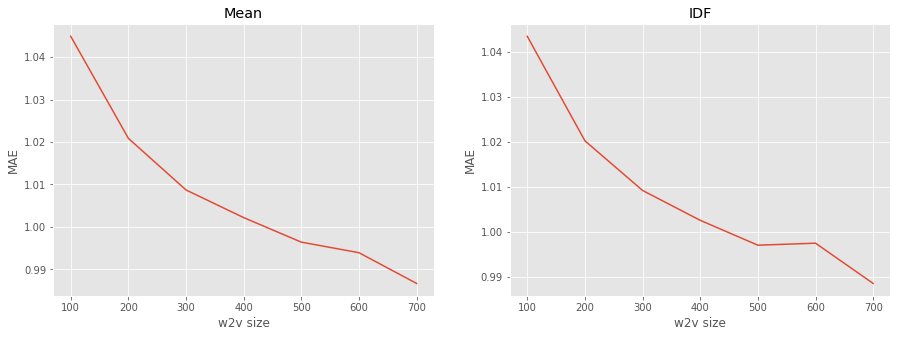

In [42]:
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(mae_mean)[:, 1], np.array(mae_mean)[:, 0])
ax[0].set_title('Mean')
ax[0].set_xlabel('w2v size')
ax[0].set_ylabel('MAE')

ax[1].plot(np.array(mae_idf)[:, 1], np.array(mae_idf)[:, 0])
ax[1].set_title('IDF')
ax[1].set_xlabel('w2v size')
ax[1].set_ylabel('MAE')

Теперь попробуйте обучить линейную регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.

### Выводы:

Эмбеддинги на предобученных модеях выдают менее качественные результаты. Скорее всего это связано с тем, что собственные эмбеддинги мы создаем на основе текста, с которым предстоит работать. В итоге близость слов определяется на основе нашего текста.

FastText:

In [43]:
from gensim.models import KeyedVectors

In [45]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2021-03-21 10:37:43--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  12.4MB/s    in 54s     

2021-03-21 10:38:38 (12.1 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [46]:
embedding_model = KeyedVectors.load_word2vec_format('/content/wiki-news-300d-1M.vec')

In [47]:
wiki_train = embed(train.to_numpy(), embedding_model, 300)
wiki_test = embed(test.to_numpy(), embedding_model, 300)

In [48]:
reg_w = LinearRegression(normalize=True).fit(wiki_train, y_train)
y_pred_w = reg_w.predict(wiki_test)

In [49]:
print(f'MAE on wiki texts = {mae(y_test, y_pred_w)}')

MAE on wiki texts = 1.027508289244707


GloVe:

In [50]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-03-21 10:44:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-03-21 10:44:45--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-03-21 10:44:45--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [51]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 300)

In [52]:
from gensim.models import KeyedVectors
filename = 'glove.6B.300d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [53]:
glove_train = embed(train.to_numpy(), model, 300)
glove_test = embed(test.to_numpy(), model, 300)

In [54]:
reg_g = LinearRegression(normalize=True).fit(glove_train, y_train)
y_pred_g = reg_g.predict(glove_test)

In [55]:
print(f'MAE on GloVe texts = {mae(y_test, y_pred_g)}')

MAE on GloVe texts = 1.0452367212444316


### Часть 3

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки. Получите ошибку меньше, чем во всех вышеперечисленных методах.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence).

In [56]:
import torch
from torch import nn
from torch.nn import functional as F
import pandas as pd
import numpy as np
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_absolute_error as mae

In [57]:
WORDS = set()
for sent in list(df['positive']):
    for w in sent:
        WORDS.add(w)
        
for sent in list(df['negative']):
    for w in sent:
        WORDS.add(w)

In [58]:
int2word = dict(enumerate(tuple(WORDS)))
word2int = {w: ii for ii, w in int2word.items()}

In [59]:
MAX_LEN = max(max(df['positive'].apply(len)), max(df['negative'].apply(len)))
MAX_LEN

399

In [60]:
from torch.nn.utils.rnn import pad_sequence
train_pad = (pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in (df_train['positive'] + df_train['negative'])], 
                           batch_first=True))

In [61]:
test_pad = (pad_sequence([torch.as_tensor([word2int[w] for w in seq][:MAX_LEN]) for seq in (df_test['positive'] + df_test['negative'])], 
                           batch_first=True))

In [62]:
# создадим новые датасеты с закодированными данными
train, test = pd.DataFrame(), pd.DataFrame()

train['encoded'] = train_pad.tolist()
train['length'] = train.encoded.apply(lambda x: (np.array(x) != 0).sum()) # длина отзыва закодированного отзыва
train['y'] = list(df_train['score'])

test['encoded'] = test_pad.tolist()
test['length'] = test.encoded.apply(lambda x: (np.array(x) != 0).sum())
test['y'] = list(df_test['score'])

In [63]:
train.head()

,encoded,length,y
0,"[175, 18383, 7231, 30425, 22225, 27723, 18179,...",28,5.8
1,"[17304, 27378, 27166, 32701, 33437, 28102, 141...",11,8.3
2,"[31173, 11191, 30463, 27695, 31268, 27108, 783...",29,9.6
3,"[30425, 25001, 9477, 13146, 23249, 25917, 1635...",53,10.0
4,"[30425, 13146, 16353, 28582, 9754, 25512, 2104...",16,10.0


In [64]:
test.head()

,encoded,length,y
0,"[30425, 18383, 33404, 16640, 31268, 908, 21761...",95,9.2
1,"[9754, 3725, 1655, 9754, 17304, 33404, 19382, ...",35,7.9
2,"[1655, 3834, 33023, 21238, 544, 18329, 16283, ...",15,8.3
3,"[20924, 55, 14108, 30555, 31484, 18329, 23264,...",11,7.9
4,"[27108, 25001, 12747, 23264, 22511, 16353, 880...",144,7.9


In [65]:
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.X = df['encoded']
        self.y = df['y']
        self.l = df['length']
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx]), self.y[idx], self.l[idx]

In [66]:
BATCH_SIZE = 1
train_dataset = ReviewsDataset(train)
test_dataset = ReviewsDataset(test)
''' 
indx_train = torch.randperm(len(train_dataset)).tolist()
indx_test = torch.randperm(len(test_dataset)).tolist()
train_dataset = torch.utils.data.Subset(train_dataset, indx_train[:-65000])
test_dataset = torch.utils.data.Subset(test_dataset, indx_test[:-22000])
'''
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [67]:
def train(model, train_dataloader, test_dataloader, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    for n in range(epochs):
        model.train().to('cuda')
        for x, y, l in tqdm(train_dataloader):
            x = x.long().to('cuda')
            y = y.float().to('cuda')
            y_pred = model(x, l).to('cuda')
            optimizer.zero_grad()
            loss = F.l1_loss(y_pred, y.unsqueeze(-1))
            loss.backward()
            optimizer.step()

        val_loss = validate(model, test_dataloader)
        print(val_loss)

def validate(model, test_dataloader):
    model.eval().to('cuda')
    total = 0
    all_losses = 0.0
    for x, y, l in tqdm(test_dataloader):
        x = x.long().to('cuda')
        y = y.float().to('cuda')
        y_pred = model(x, l).to('cuda')
        loss = F.l1_loss(y_pred, y.unsqueeze(-1)).item()
        total += y.shape[0]
        all_losses += loss * y.shape[0]
    return all_losses/total

In [68]:
class LSTM_regr(torch.nn.Module) :
    def __init__(self, word2int_len, embedding_dim, hidden_dim) :
        super().__init__()
        self.embeddings = nn.Embedding(word2int_len, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)

        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [69]:
model = LSTM_regr(word2int_len = len(word2int), embedding_dim = 300, hidden_dim = 50) 

In [70]:
train(model, train_dataloader, test_dataloader, epochs=5, lr=0.001)


1.2535823060131073



1.1889574203300477



1.0432648937606812



0.9472968768262863



0.952922644996643


Источником вдохновения для архитектуры LSTM послужила: https://www.kaggle.com/jovian/jvn-lstm-multiclass-text-classification-b8200/notebook